### Week II: Demo, Using linear regression to encode non linear relations in the data

__Material covered:__ linear regression on both linear and non linear dataset, overfitting 

### Example 1. 

In the first part, we will generate non linear data and use a linear regression model in a higher dimensional feature space to find a regression model for this data. The beauty of many machine learning algorithms rely relies on this idea of using (possibly high dimensional) linear models to learn complex (possibly non linear) datasets.

<IPython.core.display.Javascript object>


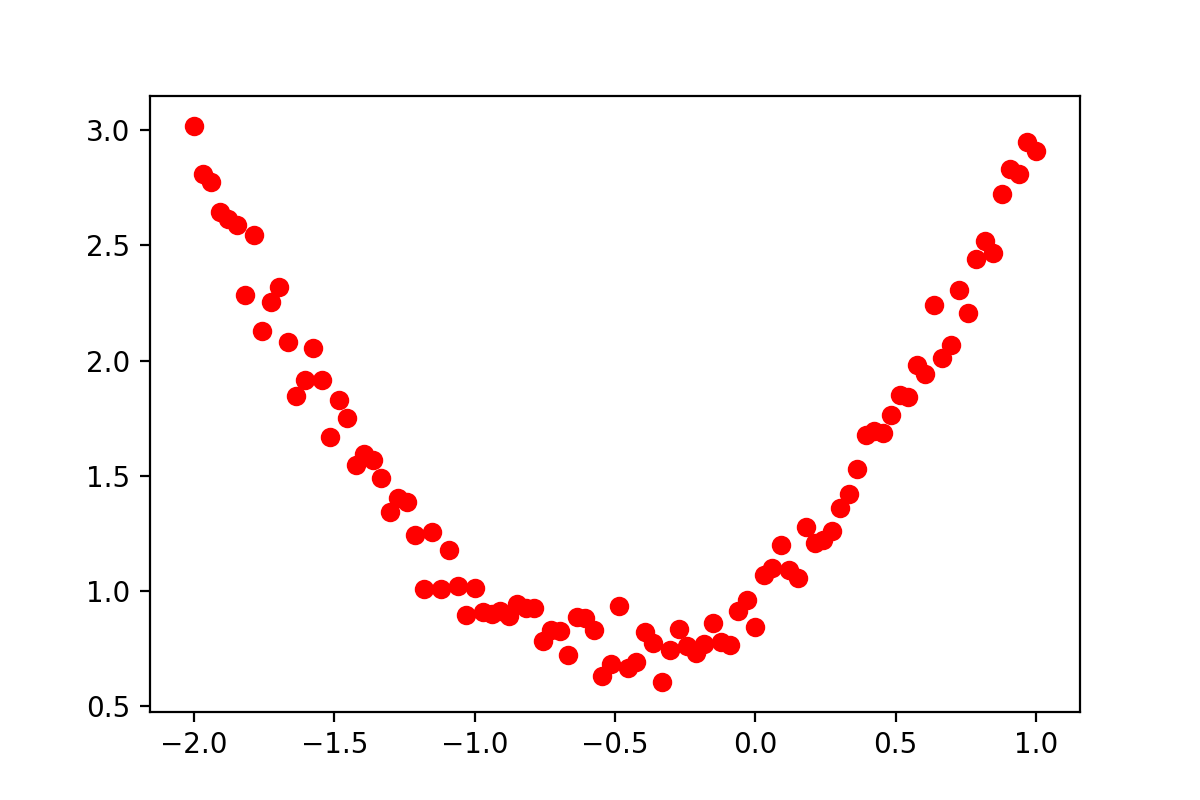

In [5]:
# We start by generating points according to a non linear (quadratic) relation

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4


x = np.linspace(-2,1, 100)
t = 1+x+x**2
t = t + np.random.normal(0,.1, len(x))

plt.scatter(x, t,color = 'r')
plt.show()
 
    
    

(100, 1)


<IPython.core.display.Javascript object>


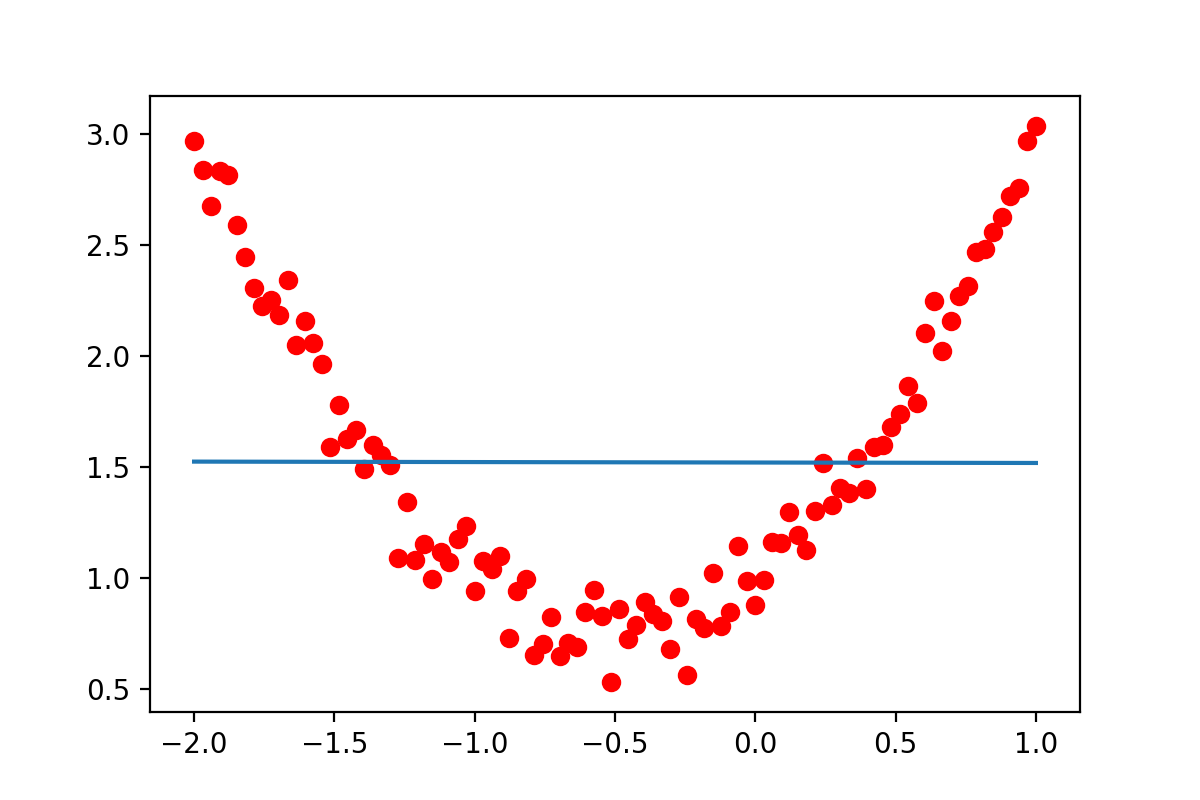

In [4]:
# As a first illustration of the limitations of linear regression, we try to fit a linear model 
# to the non linear data. As could have been expected, this obviously does not work.

from sklearn.linear_model import LinearRegression

x = x.reshape(-1,1)
print(np.shape(x))

regr = LinearRegression()
regr.fit(x, t)

test_points = np.linspace(-2,1, 100)
y_predicted = regr.predict(test_points.reshape(-1,1))

plt.scatter(x, t, color = 'r')
plt.plot(test_points, y_predicted)
plt.show()





(100,)
(100,)
(100,)


<IPython.core.display.Javascript object>


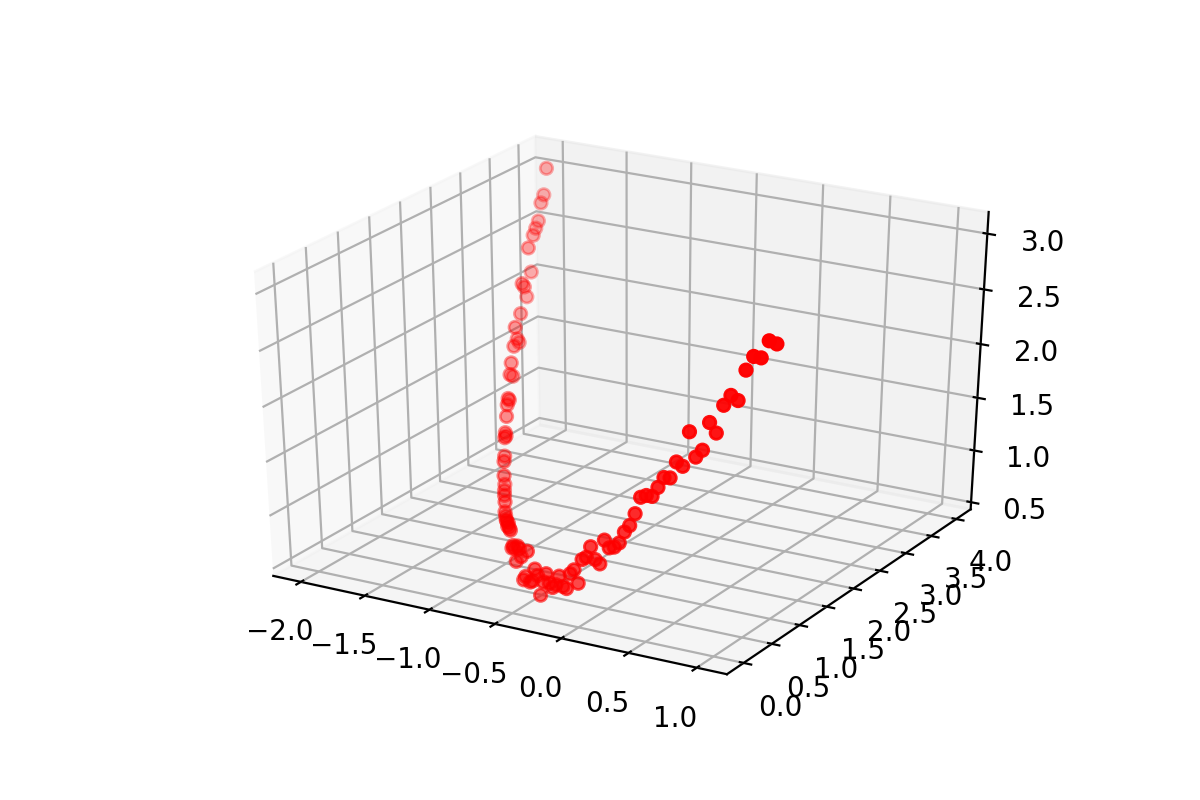

In [8]:
# We then bring the data in 2D 
# (adding one more feature, thus getting a model of the form $y(X)= beta_0 + beta_1 X_1 + beta_2 X_2), 
# In order to learn this new model, we thus need to provide data of the form $t^i, X^i_1, X^i_2$. 
# Since we only generated data of the form $t, X_1$, we generated the remaining feature $X_2$ from the  
# first feature as X_2 = X_1^2. Note that the model is still linear (it does not know that we generated 
# the new feature by squaring X_1. All it knows is that we now give it two features X1 and X2)


X  = np.hstack((x.reshape(-1,1), x.reshape(-1,1)**2))

#print(X)

regr = LinearRegression()
regr.fit(X, t)

test_points = np.linspace(-2,1, 100)

Testmat2 = np.hstack((test_points.reshape(-1,1), test_points.reshape(-1,1)**2))

y_predicted2 = regr.predict(Testmat2)

from mpl_toolkits.mplot3d import Axes3D 

print(np.shape(X[:,0]))
print(np.shape(X[:,1]))
print(np.shape(t))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], t, color='r')
plt.show()


<IPython.core.display.Javascript object>


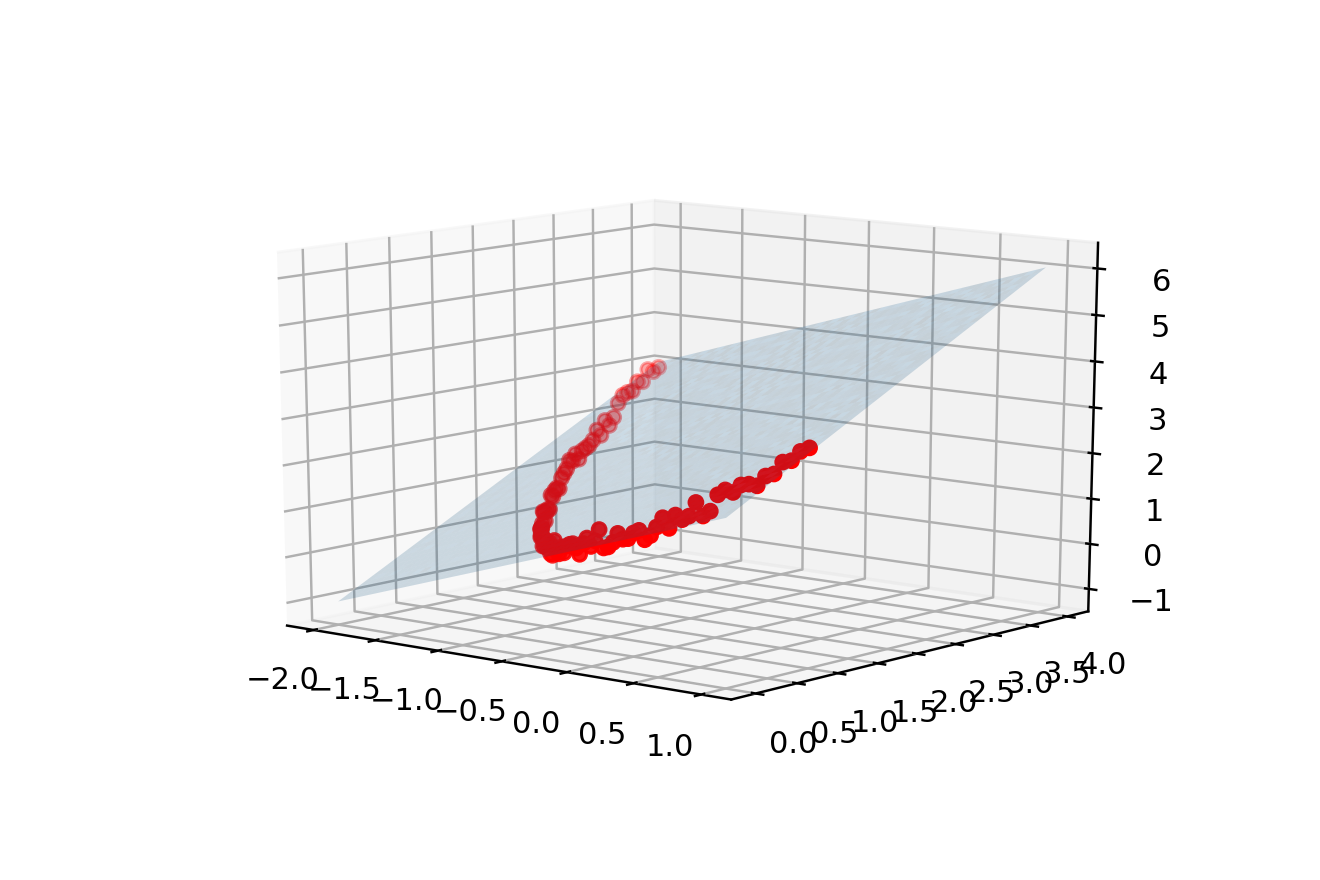

In [4]:
# Now that we have increased the dimension of the data, as you perhaps already see from the figure above, 
# the points are now clearly living on some (linear) plane. They are not covering the whole plane though but 
# their location on the plane is encoded through the (implicit) relation X2 = X1^2  
# In particular, if we can learn the expression for the plane, we should then be able to predict the target 
# of a new point. 

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-2, 1, 50), np.linspace(0, 4, 50))

target_mesh = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

y_predicted = regr.predict(target_mesh)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.reshape(xx, (50,50)), np.reshape(yy, (50,50)),np.reshape(y_predicted, (50,50)), alpha=0.2)
ax.scatter(X[:,0], X[:,1], t, color='r')
for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show()




<IPython.core.display.Javascript object>


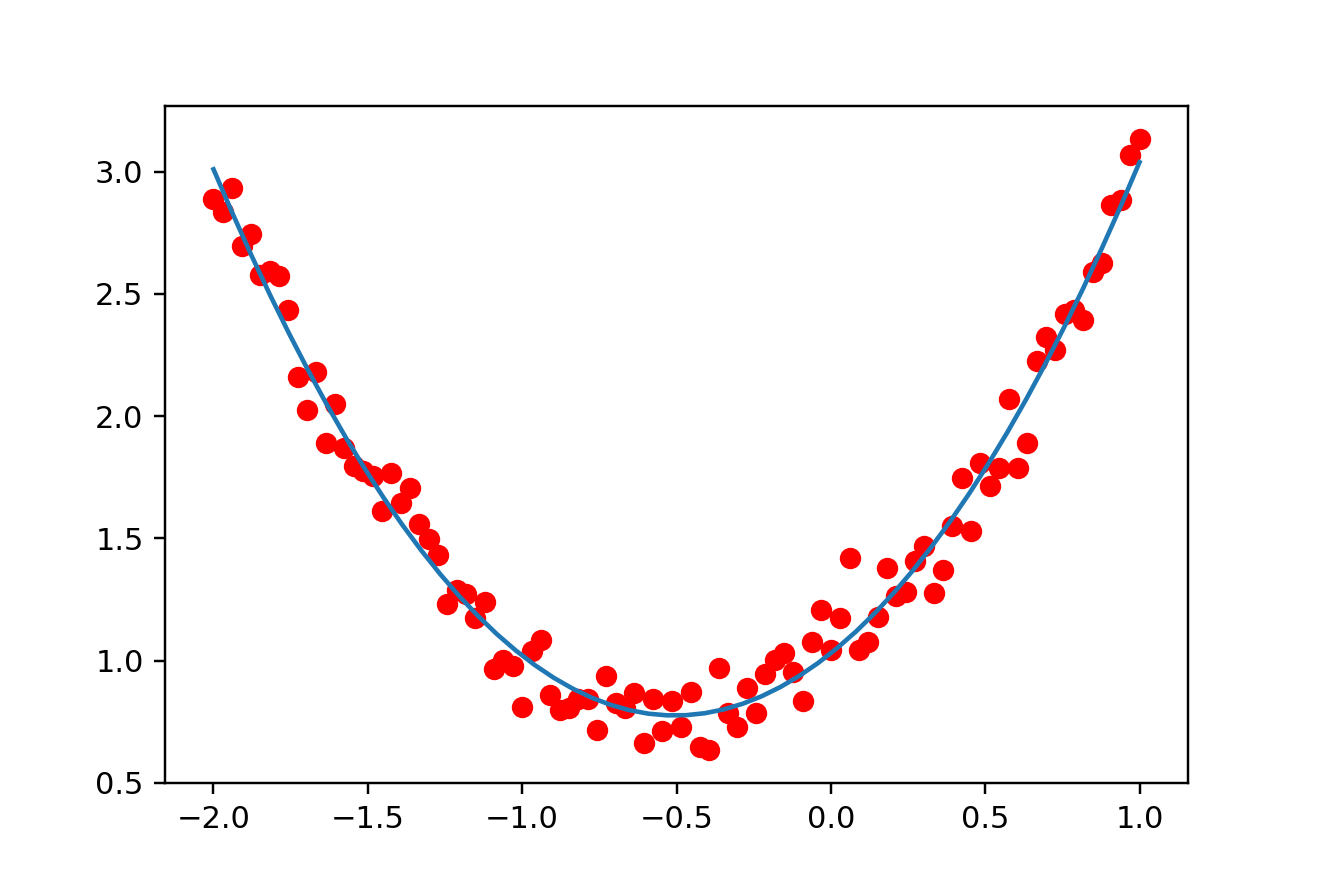

In [13]:
# To learn the parabola in the low dimensional space, we can just take the data (t,X1) associated to a new point,
# obtain X2 by squaring X1, learn t from the plane according to t = beta_1 X_1 + beta_2 X_2 
# (since X2 is obtained as X1^2 it will "fall" along the parabola). We then only retain the 
# learned t and X1 and plot the result. 

Testmat2 = np.hstack((np.linspace(-2,1,50).reshape(-1,1), np.linspace(-2,1,50).reshape(-1,1)**2))

y_predicted2 = regr.predict(Testmat2)

fig = plt.figure()
plt.scatter(X[:,0].reshape(-1,1), t, color='r')
plt.plot(Testmat2[:,0].reshape(-1,1), y_predicted2.reshape(-1,1))
plt.show()


### Example 2. 

In this second part, we will study the effect of increasing the number of features on the prediction. We will generate data according to sin(x) + noise so that it is difficulty to fit the data, even with a high degree polynomial. We will illustrate this by trying to fit the model with monomials of degree up to $30$. For wuch a high degree the model complexity is so high that we give the possibility to the model to almost exactly fit the noise (which we typically would like to avoid). Since the model fit a random noise, its prediction for a new point will be catastrophic as shown below. This phenomenon is kwnown as overfitting. 

<IPython.core.display.Javascript object>


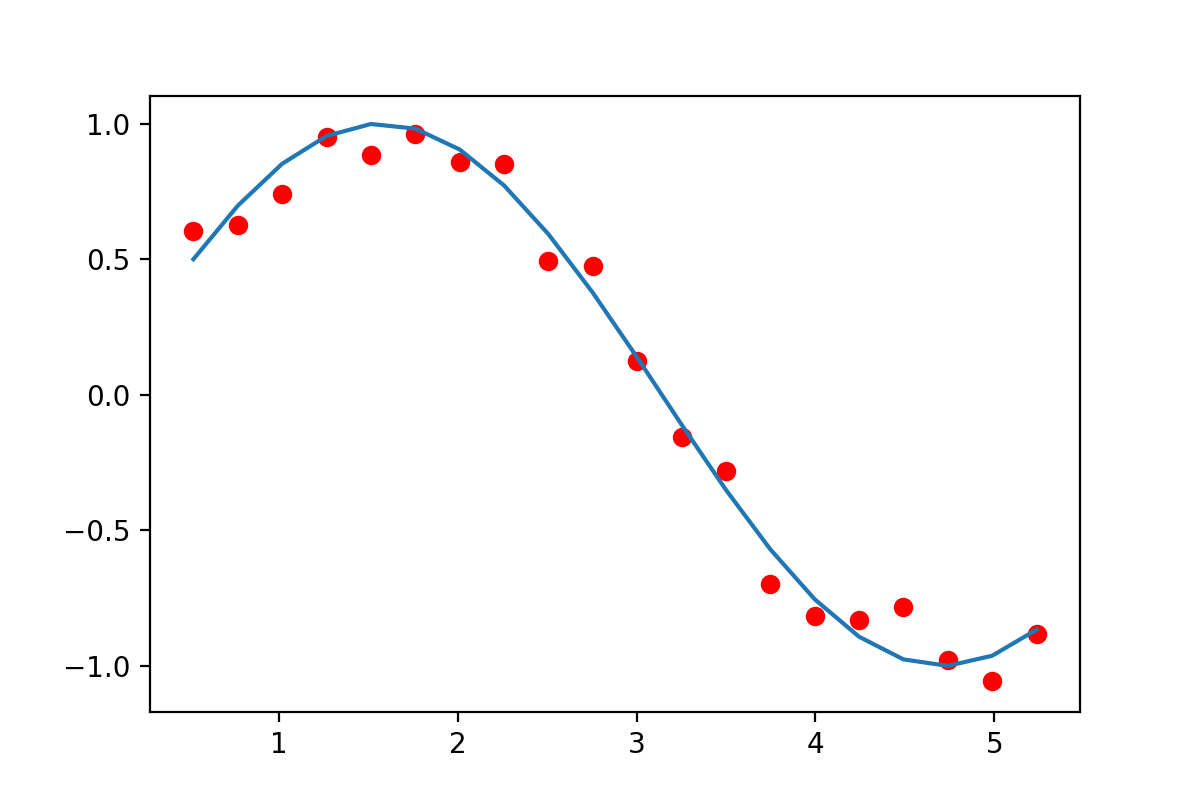

In [11]:
# We start by generating points according to a trigonometric (sine) function 

import numpy as np

x = np.linspace(np.pi/6.0, 10.0*np.pi/6.0, 20)

epsilon = np.random.normal(0,0.1, 20)

tnoisy = np.sin(x) + epsilon
tnoiseless = np.sin(x)
#print(tnoisy.reshape(-1,1))
#print(x.reshape(-1,1))

import matplotlib.pyplot as plt
plt.scatter(x.reshape(-1,1), tnoisy.reshape(-1,1),color='r')
plt.plot(x.reshape(-1,1), tnoiseless.reshape(-1,1))
plt.show()




<IPython.core.display.Javascript object>


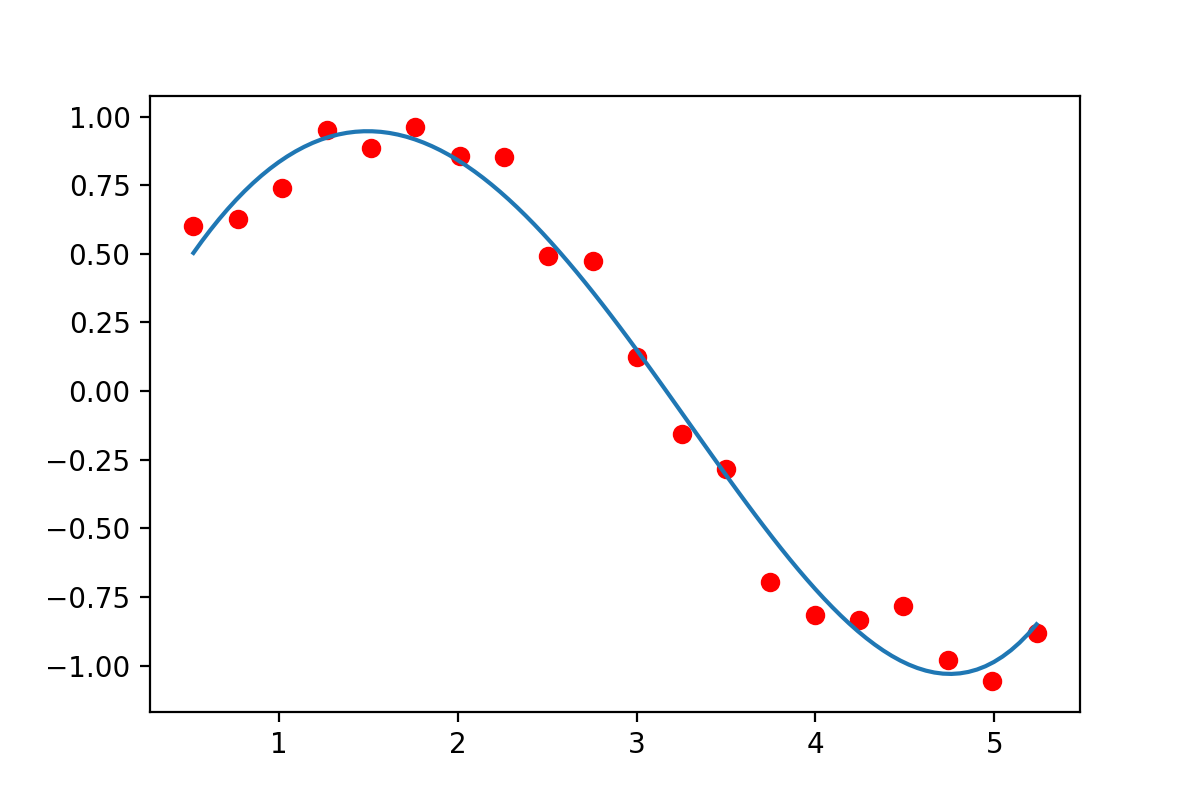

In [15]:
# As shown below a model with features encoding degree four monomials seems to be a good choice

import numpy as np
from sklearn.linear_model import LinearRegression

deg = [2,4,6,30]

l=1
    
total_degreeList = np.arange(0,deg[l])+1
X = np.power(x.reshape(-1,1), total_degreeList)
#tnoisy
reg = LinearRegression().fit(X, tnoisy)

xnew = np.linspace(np.pi/6.0, 10.0*np.pi/6.0, 100)

X_for_prediction = np.power(xnew.reshape(-1,1), total_degreeList)
target_predicted = reg.predict(X_for_prediction)

plt.scatter(x.reshape(-1,1), tnoisy.reshape(-1,1),color='r')
plt.plot(xnew.reshape(-1,1), target_predicted.reshape(-1,1))
plt.show()



<IPython.core.display.Javascript object>


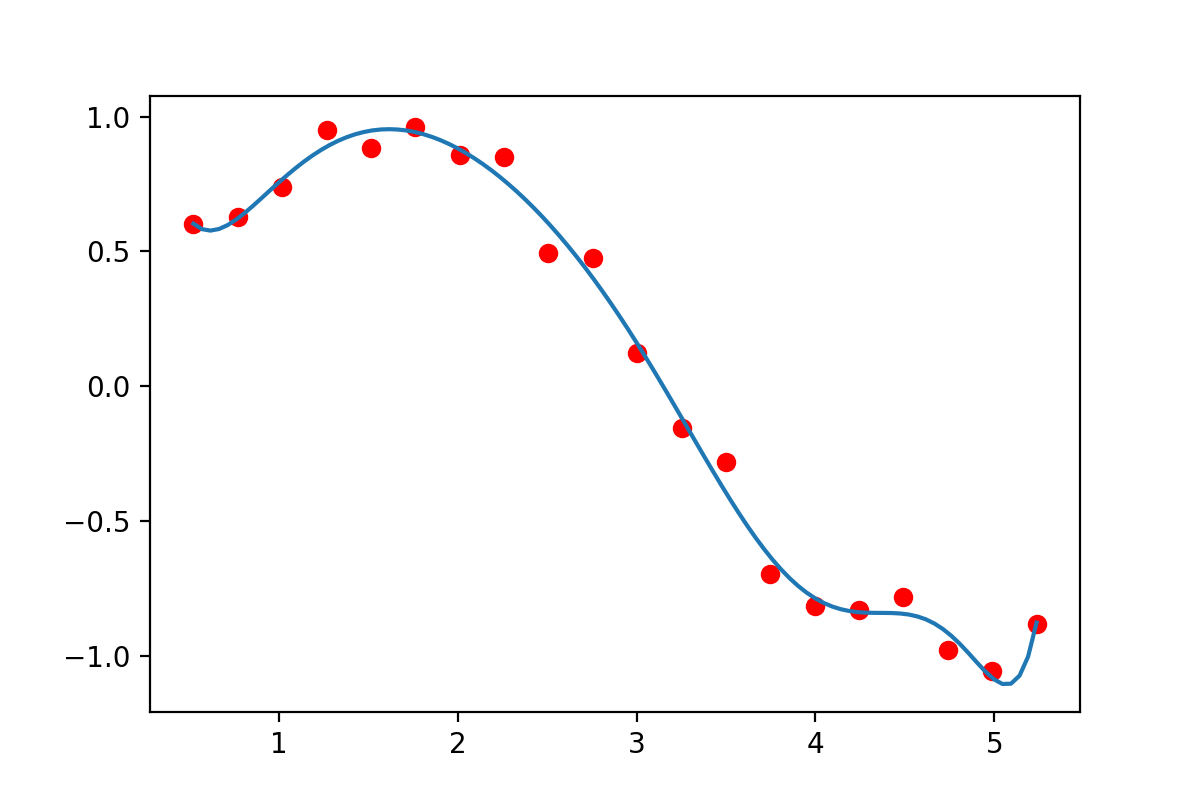

In [16]:
# When increasing the degree, we see that the model starts fitting the noisy points exactly because of its 
# high freedom. As shown below, this leads to a model which does not look anything like the sine that we recovered 
# through the degree four features anymore.  


import numpy as np
from sklearn.linear_model import LinearRegression

deg = [2,4,10,30]

l=2
    
total_degreeList = np.arange(0,deg[l])+1
X = np.power(x.reshape(-1,1), total_degreeList)
#tnoisy
reg = LinearRegression().fit(X, tnoisy)

xnew = np.linspace(np.pi/6.0, 10.0*np.pi/6.0, 100)

X_for_prediction = np.power(xnew.reshape(-1,1), total_degreeList)
target_predicted = reg.predict(X_for_prediction)

plt.scatter(x.reshape(-1,1), tnoisy.reshape(-1,1),color='r')
plt.plot(xnew.reshape(-1,1), target_predicted.reshape(-1,1))
plt.show()



<IPython.core.display.Javascript object>


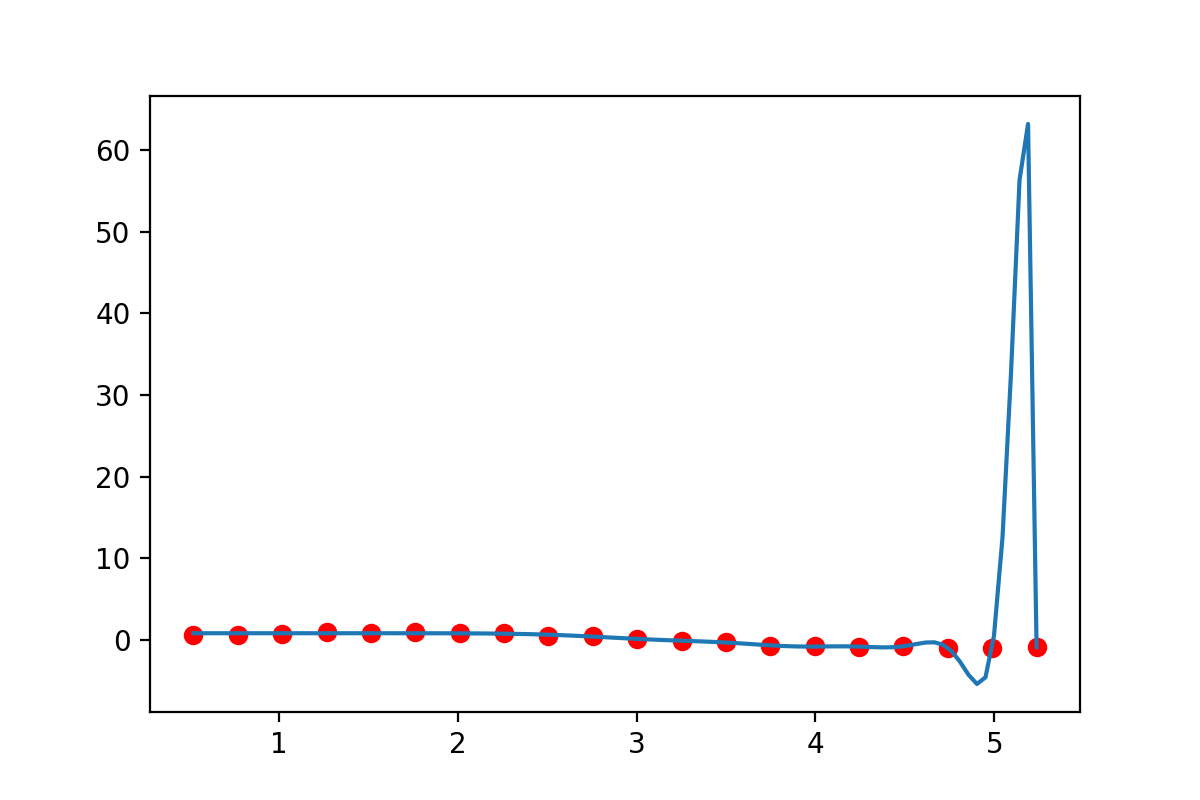

In [17]:
# finally, if we further push the degree, we see that the fitting of the model to the (noisy) 
# training set is so good that it will lead to huge blow up outside this data. This is explained by the fact that 
# the loss that we consider only takes into account the points from the noisy training set. We don't require the model to 
# behave in certain ways outside this set. 

import numpy as np
from sklearn.linear_model import LinearRegression

deg = [2,4,6,30]

l=3
    
total_degreeList = np.arange(0,deg[l])+1
X = np.power(x.reshape(-1,1), total_degreeList)
#tnoisy
reg = LinearRegression().fit(X, tnoisy)

xnew = np.linspace(np.pi/6.0, 10.0*np.pi/6.0, 100)

X_for_prediction = np.power(xnew.reshape(-1,1), total_degreeList)
target_predicted = reg.predict(X_for_prediction)

plt.scatter(x.reshape(-1,1), tnoisy.reshape(-1,1),color='r')
plt.plot(xnew.reshape(-1,1), target_predicted.reshape(-1,1))
plt.show()

